In [3]:
import numpy as np
import matplotlib.pyplot as plt
from data import Data
from GD import (loss,
                g,
                l2,
                l2_g,
                init_w,
                predict)

In [4]:
data_loader = Data(r"..\breast+cancer+wisconsin+diagnostic\wdbc.data")
X = data_loader.get_X()
y = data_loader.get_y()
X_normalized = data_loader.normalize_data(X)
X_with_bias = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

In [5]:
X_train, X_test, y_train, y_test = data_loader.split_data(X_with_bias, y, test_size=0.2)

#### Gradeint Descent (No Regularization)

In [6]:
n_features = X_train.shape[1]
w = init_w(n_features)

In [7]:
learning_rate = 0.01
epochs =  1000

current_loss = loss(X_train, y_train, w)
# print(f"Before training Loss: {current_loss}")

predictions = predict(X_test, w)
accuracy = np.mean(predictions == y_test)
# print(f"Before training Accuracy: {accuracy * 100:.4f}%")
# print()

loss_values = [current_loss]
accuracy_values = [accuracy]

for epoch in range(1, epochs+1):
    gradient = g(X_train, y_train, w)
    w -= learning_rate * gradient

    current_loss = loss(X_train, y_train, w)
    loss_values.append(current_loss)
    # print(f"Epoch {epoch}, Loss: {current_loss}")
    
    predictions = predict(X_test, w)
    accuracy = np.mean(predictions == y_test)
    accuracy_values.append(accuracy)
    # print(f"Accuracy: {accuracy * 100:.4f}%")
    # print()


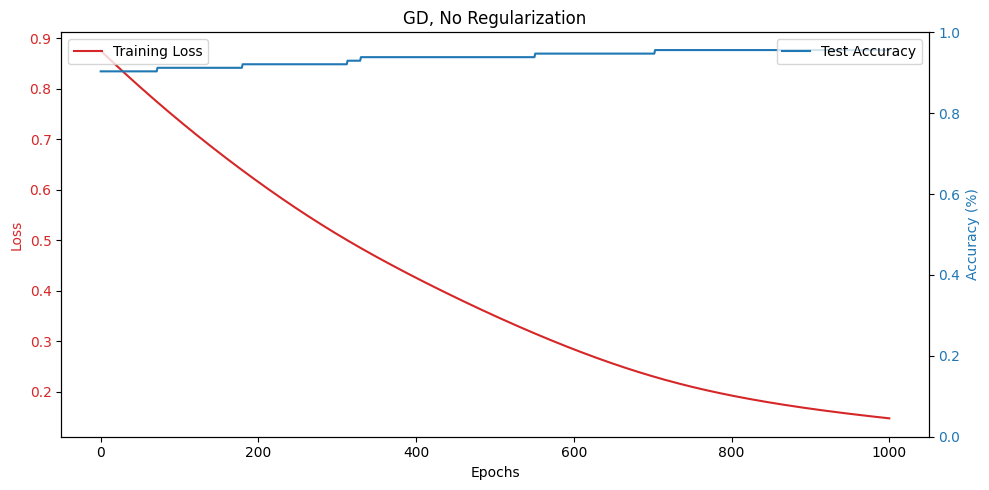

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(range(0, epochs + 1), loss_values, label='Training Loss', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy (%)', color='tab:blue')
ax2.plot(range(0, epochs + 1), accuracy_values, label='Test Accuracy', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0, 1)

plt.title('GD, No Regularization')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [9]:
predictions = predict(X_train, w)
accuracy = np.mean(predictions == y_train)
print(f"Training Accuracy: {accuracy * 100:.4f}%")

predictions = predict(X_test, w)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy * 100:.4f}%")

Training Accuracy: 94.5055%
Test Accuracy: 95.6140%


#### Stochastic Gradeint Descent (No Regularization)

In [10]:
n_features = X_train.shape[1]
w = init_w(n_features)

In [11]:
learning_rate = 0.01
epochs =  1000

current_loss = loss(X_train, y_train, w)
# print(f"Before training Loss: {current_loss}")

predictions = predict(X_test, w)
accuracy = np.mean(predictions == y_test)
# print(f"Before training Accuracy: {accuracy * 100:.4f}%")
# print()

loss_values = [current_loss]
accuracy_values = [accuracy]

for epoch in range(1, epochs+1):
    random_sample_index = np.random.choice(X_train.shape[0], 1)
    random_x = X_train[random_sample_index]
    random_y = y_train[random_sample_index]
    
    gradient = g(random_x, random_y, w)
    w -= learning_rate * gradient

    current_loss = loss(X_train, y_train, w)
    loss_values.append(current_loss)
    # print(f"Epoch {epoch}, Loss: {current_loss}")
    
    predictions = predict(X_test, w)
    accuracy = np.mean(predictions == y_test)
    accuracy_values.append(accuracy)
    # print(f"Accuracy: {accuracy * 100:.4f}%")
    # print()


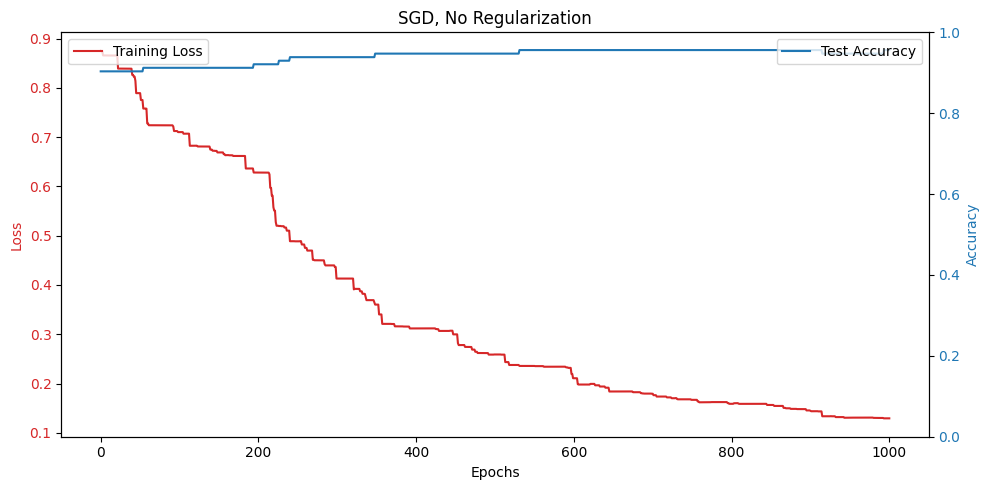

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(range(0, epochs + 1), loss_values, label='Training Loss', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(range(0, epochs + 1), accuracy_values, label='Test Accuracy', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0, 1)

plt.title('SGD, No Regularization')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [13]:
predictions = predict(X_train, w)
accuracy = np.mean(predictions == y_train)
print(f"Training Accuracy: {accuracy * 100:.4f}%")

predictions = predict(X_test, w)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy * 100:.4f}%")

Training Accuracy: 95.3846%
Test Accuracy: 95.6140%


#### Gradient Descent (L2 Regularization)

In [14]:
n_features = X_train.shape[1]
w = init_w(n_features)

In [15]:
learning_rate = 0.01
epochs =  1000
_lambda = 0.1

current_loss = loss(X_train, y_train, w) + l2(w, _lambda)
# print(f"Before training Loss: {current_loss}")

predictions = predict(X_test, w)
accuracy = np.mean(predictions == y_test)
# print(f"Before training Accuracy: {accuracy * 100:.4f}%")
# print()

loss_values = [current_loss]
accuracy_values = [accuracy]

for epoch in range(1, epochs+1):
    gradient = g(X_train, y_train, w) + l2_g(w, _lambda)
    w -= learning_rate * gradient

    current_loss = loss(X_train, y_train, w) + l2(w, _lambda)
    loss_values.append(current_loss)
    # print(f"Epoch {epoch}, Loss: {current_loss}")
    
    predictions = predict(X_test, w)
    accuracy = np.mean(predictions == y_test)
    accuracy_values.append(accuracy)
    # print(f"Accuracy: {accuracy * 100:.4f}%")
    # print()


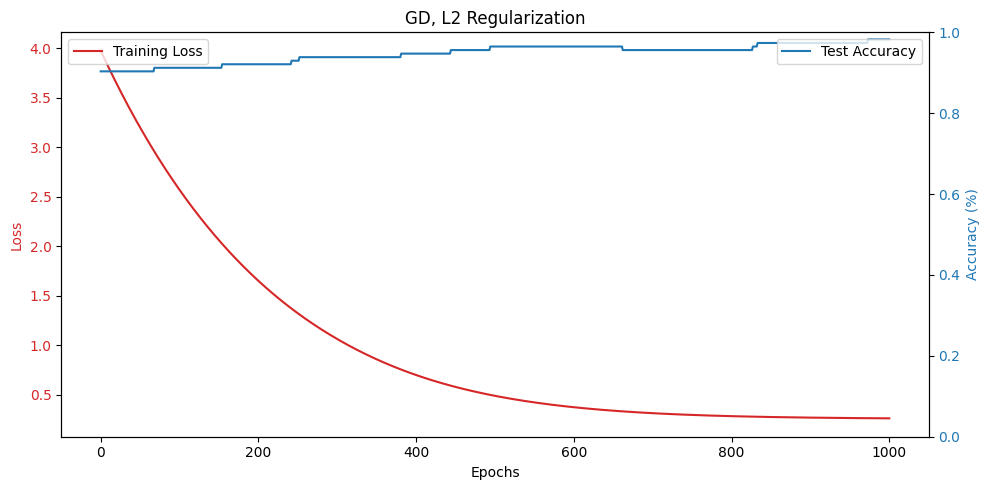

In [16]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(range(0, epochs + 1), loss_values, label='Training Loss', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy (%)', color='tab:blue')
ax2.plot(range(0, epochs + 1), accuracy_values, label='Test Accuracy', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0, 1)

plt.title('GD, L2 Regularization')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [17]:
predictions = predict(X_train, w)
accuracy = np.mean(predictions == y_train)
print(f"Training Accuracy: {accuracy * 100:.4f}%")

predictions = predict(X_test, w)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy * 100:.4f}%")

Training Accuracy: 97.1429%
Test Accuracy: 98.2456%


#### Stochastic Gradient Descent (L2 Regularization)

In [18]:
n_features = X_train.shape[1]
w = init_w(n_features)

In [19]:
learning_rate = 0.01
epochs = 1000
_lambda = 0.1

current_loss = loss(X_train, y_train, w) + l2(w, _lambda)
# print(f"Before training Loss: {current_loss}")

predictions = predict(X_test, w)
accuracy = np.mean(predictions == y_test)
# print(f"Before training Accuracy: {accuracy * 100:.4f}%")
# print()

loss_values = [current_loss]
accuracy_values = [accuracy]

for epoch in range(1, epochs+1):
    random_sample_index = np.random.choice(X_train.shape[0], 1)
    random_x = X_train[random_sample_index]
    random_y = y_train[random_sample_index]
    
    gradient = g(random_x, random_y, w) + l2_g(w, _lambda)
    w -= learning_rate * gradient

    current_loss = loss(X_train, y_train, w) + l2(w, _lambda)
    loss_values.append(current_loss)
    # print(f"Epoch {epoch}, Loss: {current_loss}")
    
    predictions = predict(X_test, w)
    accuracy = np.mean(predictions == y_test)
    accuracy_values.append(accuracy)
    # print(f"Accuracy: {accuracy * 100:.4f}%")
    # print()


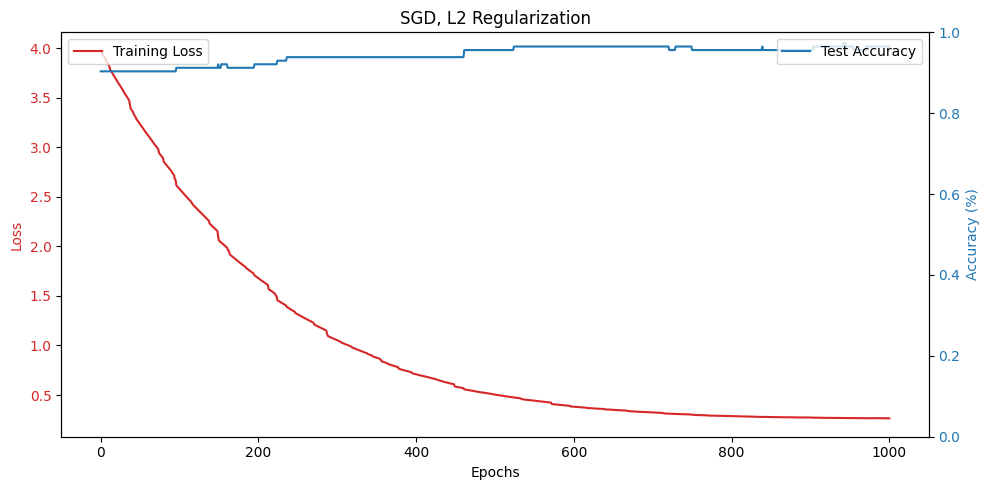

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(range(0, epochs + 1), loss_values, label='Training Loss', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy (%)', color='tab:blue')
ax2.plot(range(0, epochs + 1), accuracy_values, label='Test Accuracy', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0, 1)

plt.title('SGD, L2 Regularization')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [21]:
predictions = predict(X_train, w)
accuracy = np.mean(predictions == y_train)
print(f"Training Accuracy: {accuracy * 100:.4f}%")

predictions = predict(X_test, w)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy * 100:.4f}%")

Training Accuracy: 96.2637%
Test Accuracy: 96.4912%
